In [1]:
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [150]:
#导入数据
# 引入订单数据
df = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\seasons.xlsx",sheet_name='Sheet4',dtype={'sSpbh':str,'sSpmc':str})
df=df.fillna(0)
df.head()

,drq,sspmc,nzhzb
0,2019-01-01,0,0.0
1,2019-01-02,0,0.0
2,2019-01-03,0,0.0
3,2019-01-04,0,0.0
4,2019-01-05,0,0.0


In [ ]:
# 时间序列库导入
from statsmodels.tsa.seasonal import seasonal_decompose,STL



In [172]:
# 移动平均值计算
s1=df.loc[:,['drq','nzhzb']].rolling(window=90,center=False)
v=s1.mean()
v=v.dropna(axis=0)

d=list(df.loc[v.index,'drq'].astype(str))

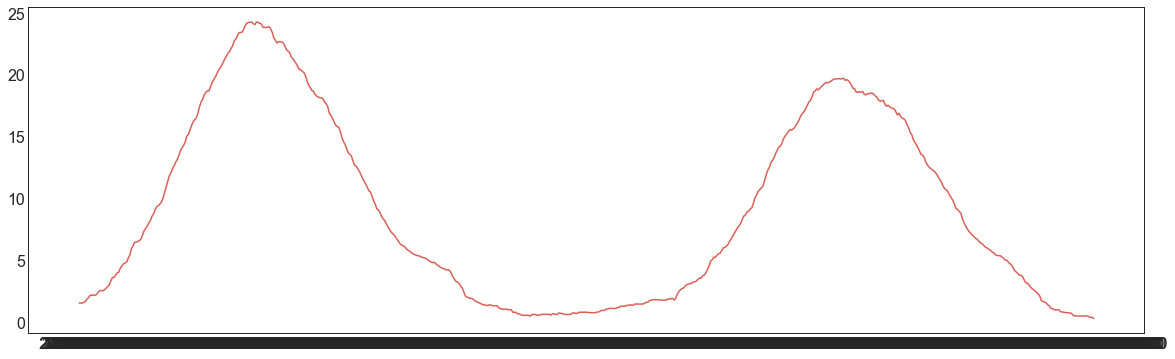

In [173]:
plt.figure(figsize=(20,6))
# plt.plot(sales_day['drq'],sales_day['nxsje']);
# t=list([drq[i] for i in range(len(drq)) if i%5==0]);
# plt.xticks(t,Rotation=30);
# for x,y in zip(t,sales_day['nxsje']):
#     plt.text(x,y,'%.2f'%y,fontsize=15)
# plt.show(); #show 能隐藏很多细节信息
plt.plot(d,v)

In [174]:
# 最大值 25% 75% 分位数
print(np.percentile(v,75,axis=0),max(v.values),np.percentile(v,40,axis=0),np.std(v.values),np.mean(v.values))

[16.00612302] [24.32764871] [4.81306073] 7.45883975470909 9.0375693404119


In [175]:
look=v.loc[v['nzhzb']>=11]
drq_look=df.loc[look.index,'drq']
drq_look

145             2019-05-26
146             2019-05-27
147             2019-05-28
148             2019-05-29
149             2019-05-30
150             2019-05-31
151             2019-06-01
152             2019-06-02
153             2019-06-03
154             2019-06-04
155             2019-06-05
156             2019-06-06
157             2019-06-07
158             2019-06-08
159             2019-06-09
160             2019-06-10
161             2019-06-11
162             2019-06-12
163             2019-06-13
164             2019-06-14
165             2019-06-15
166             2019-06-16
167             2019-06-17
168             2019-06-18
169             2019-06-19
170             2019-06-20
171             2019-06-21
172             2019-06-22
173             2019-06-23
174             2019-06-24
175             2019-06-25
176             2019-06-26
177             2019-06-27
178             2019-06-28
179             2019-06-29
180             2019-06-30
181             2019-07-01
1

In [148]:
# 正态检验
from scipy import stats

In [158]:
v=v.loc[v.index<350]
stats.kstest(v['nzhzb'], 'norm', (np.mean(v.values), np.std(v.values)))
# 检验结果看不是正态分布，只是样子长得像，不能作为依据

KstestResult(statistic=0.15084405704092124, pvalue=7.552679631051169e-06)

In [160]:
print(stats.shapiro(v['nzhzb']))

ShapiroResult(statistic=0.8690250515937805, pvalue=1.9344480851153298e-14)


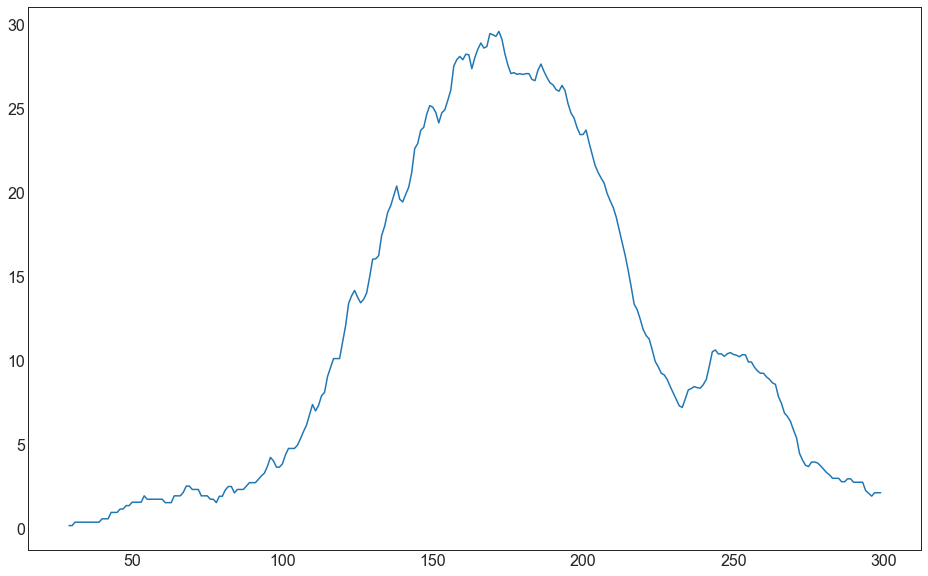

In [159]:
plt.plot(v)

ShapiroResult(statistic=0.9997853636741638, pvalue=0.4295405149459839)


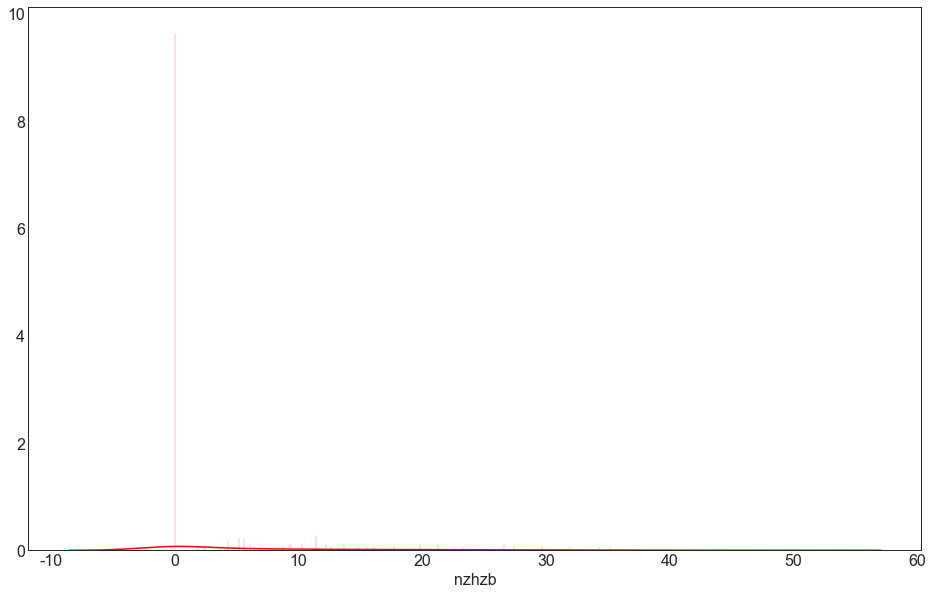

In [167]:
random3=np.random.randn(10000)
# plt.plot(d_t)
print(stats.shapiro(random3))

import seaborn as sns #使用seaborn 库画直方图验证结果
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(df['nzhzb'],color="r",bins=1000,kde=True) #绘制直方图，color设置颜色，bins设置直方图的划分数
plt.show() #显示验证结果

In [ ]:
import statsmodels